In [78]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data loading

In [26]:
# socio_data_path = '../data/CBase de datos_PRESEEA.xlsx'
socio_data_path = '../data/base95socio.xlsx'
socio_data = pd.read_excel(socio_data_path)

In [27]:
continuous_cols = [
    'edad', 'edad.R', 'edad.llegada.k', 'residencia.k', 
    'estudios', 'educar', 'renta', 'ocupación', 'ocupar',
    'activos.inactivos', 'sector', 'ocupar2', 'ocupar3', 'nacional', 
    'local', 'deportiva', 'libros', 'tele', 'radio', 'media',
    'estudipadr', 'educarpadr', 'estudimadr', 'educarmadr'
    'ocupacpadre', 'ocupar.padre', 'activo.padre', 'sector.padre', 
    'ocupar.2.padre', 'ocupar.3.padre', 'ocupacmadre', 'ocuparmadre', 
    'activo.madre', 'sector.madre', 'ocupar.2.madre', 'ocupar.3.madre',
    'clase', 'clase.familia', 'clases.K', 
    'nnombres', 'densidad', 'multiplicidad', 'EIR.todos', 'EIR.trabajo',
    'ind.relac.k', 'modo.de.vida.k'
]

In [28]:
# Remove duplicates
socio_data = socio_data.drop_duplicates()

In [31]:
# Impute missing value as 9
socio_data = socio_data.replace(np.nan, 9)

In [37]:
# Check no column have missing values
missing = socio_data.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

In [33]:
# Check which columns have the highest number of unique values
unique = socio_data.nunique()
unique = unique.sort_values(ascending=False)
unique

INFORMANTE.x       46
edad               36
ocupacpadre        23
barrio             19
barrio.2           18
                   ..
activo.madre        2
sector.madre        2
audiencia           2
mercado.Sankoff     1
norma.K             1
Length: 86, dtype: int64

# Data cleaning

In [34]:
# Make all columns that are not in continuous_cols categorical
for col in socio_data.columns:
    if col not in continuous_cols:
        socio_data[col] = socio_data[col].astype('category')

# Train clustering model

In [35]:
# Train KMeans to get the clusters
from sklearn.cluster import KMeans

In [36]:
# Impute missing value as 9
socio_data = socio_data.replace(np.nan, 9)

In [71]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(socio_data.drop(columns=['INFORMANTE.x']))
socio_data['cluster'] = kmeans.labels_

In [72]:
# Check the distribution of the clusters
socio_data['cluster'].value_counts()

cluster
0    17
1     9
2     8
4     4
5     3
8     2
6     1
7     1
3     1
Name: count, dtype: int64

In [73]:
# Check how good the clusters are
from sklearn.metrics import silhouette_score

silhouette_score(socio_data.drop(columns=['INFORMANTE.x']), socio_data['cluster'])

np.float64(0.4618482146805051)

In [74]:
# Save to csv
socio_data.to_csv('../data/socio_clusters.csv', index=False)

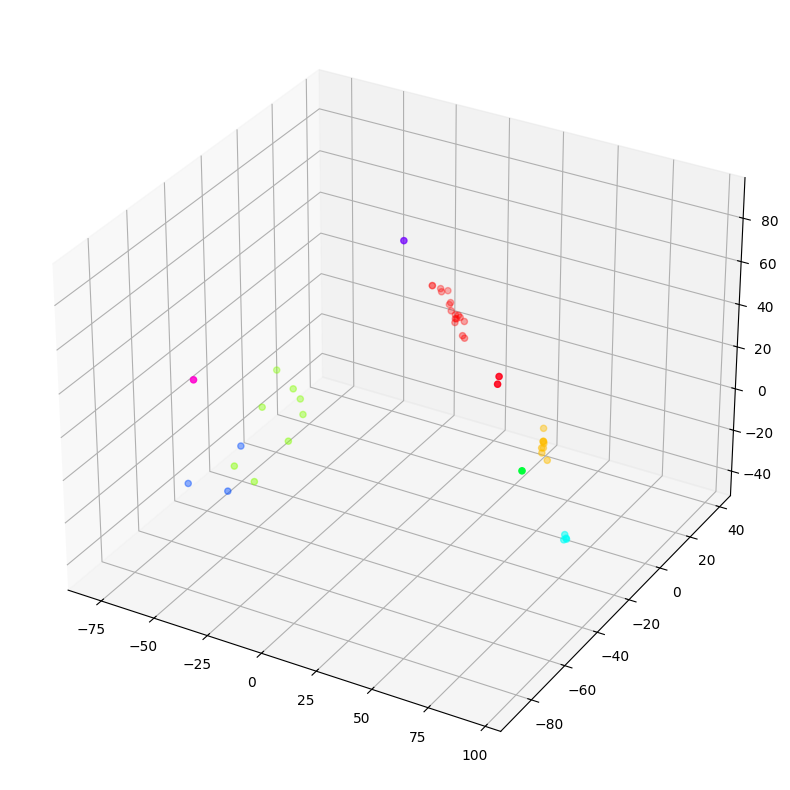

In [80]:
# Decompose into 3 PCA components and plot it in 3D with clusters as colors
pca = PCA(n_components=3)
pca_result = pca.fit_transform(socio_data.drop(columns=['INFORMANTE.x', 'cluster']))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=socio_data['cluster'], cmap='hsv')
# Save figure
plt.savefig('../socio_clusters_3PCA.png')
plt.show()